In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import seaborn as sns



In [3]:
%matplotlib inline

In [4]:
plt.rcParams["figure.figsize"] = (10, 5)


In [5]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

# booo

Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [6]:
if os.path.isfile("bars-and-pubs-with-patron-capacity.csv"):
    filepath = "bars-and-pubs-with-patron-capacity.csv"
    print("loading from file")
else:
    filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv"
    print("loading from the internet")
pub_data = pd.read_csv(filepath,skiprows=1)
print("done")


loading from file
done


We can also get the list of columns out of the data frame

In [7]:
pub_data.columns

Index(['Census year', 'Block ID', 'Property ID', 'Base property ID',
       'Building address', 'CLUE small area', 'Trading name',
       'Business address', 'Number of patrons', 'Longitude', 'Latitude',
       'location'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the `iloc` property. That means the _interger location_, so the zeroeth row would be `df.iloc[0]`. 

This gives us the row as a _Series_.

↓

In [8]:
row_one = pub_data.iloc[1]
row_one


Census year                                           2002
Block ID                                                14
Property ID                                         103172
Base property ID                                    103172
Building address     31-39 Elizabeth Street MELBOURNE 3000
CLUE small area                            Melbourne (CBD)
Trading name                               Connells Tavern
Business address        35 Elizabeth Street MELBOURNE 3000
Number of patrons                                      350
Longitude                                       144.964322
Latitude                                        -37.817426
location              -37.81742610667125, 144.964321660097
Name: 1, dtype: object

In [9]:
land_use_data = {
    'CLUE small area': ['Melbourne (CBD)', 'Carlton', 'Parkville', 'North Melbourne'],
    'Land use type': ['Commercial', 'Mixed', 'Residential', 'Industrial'],
    'Employment': [50000, 15000, 10000, 20000]
}
land_use_df = pd.DataFrame(land_use_data)

In [10]:
merged_data = pd.merge(pub_data, land_use_df, on='CLUE small area')

In [16]:
merged_data.head()

,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Trading name,Business address,Number of patrons,Longitude,Latitude,location,Land use type,Employment
0,2002,11,108972,108972,10-22 Spencer Street MELBOURNE 3000,Melbourne (CBD),Explorers Inn,10-22 Spencer Street MELBOURNE 3000,50,144.955254,-37.820511,"-37.82051068881513, 144.95525416628004",Commercial,50000
1,2002,14,103172,103172,31-39 Elizabeth Street MELBOURNE 3000,Melbourne (CBD),Connells Tavern,35 Elizabeth Street MELBOURNE 3000,350,144.964322,-37.817426,"-37.81742610667125, 144.964321660097",Commercial,50000
2,2002,15,103944,103944,277-279 Flinders Lane MELBOURNE 3000,Melbourne (CBD),De Biers,"Unit 1, Basement , 277 Flinders Lane MELBOURNE...",400,144.965307,-37.817242,"-37.81724194023457, 144.96530699086",Commercial,50000
3,2002,16,103938,103938,187 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Adelphi Hotel,187 Flinders Lane MELBOURNE 3000,80,144.968385,-37.816360,"-37.81635974400108, 144.9683846004515",Commercial,50000
4,2002,17,103925,103925,121-123 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Velour,"Unit 1, Gnd & Bmt , 121 Flinders Lane MELBOURN...",350,144.970523,-37.815674,"-37.815673646380745, 144.97052296371248",Commercial,50000


In [29]:
merged_data["CLUE small area"].value_counts()

CLUE small area
Melbourne (CBD)    3198
Carlton             293
North Melbourne     287
Parkville            69
Name: count, dtype: int64

<Axes: xlabel='Census year'>

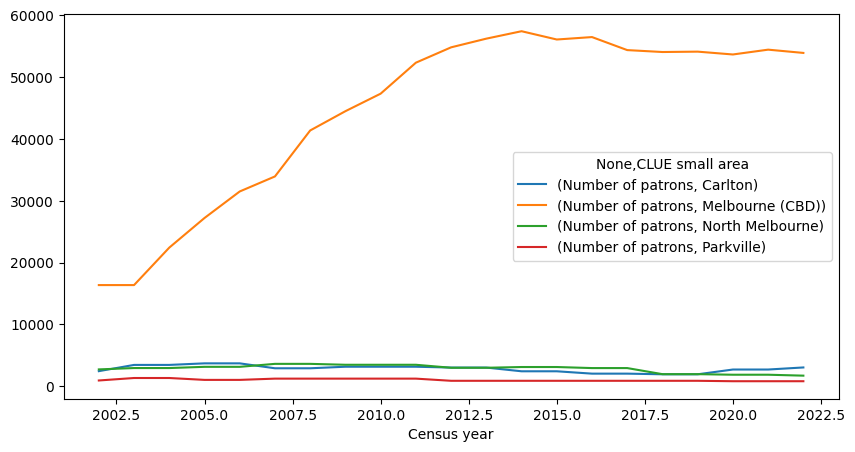

In [35]:
merged_data[["Census year", "CLUE small area", "Number of patrons"]].groupby(["Census year", "CLUE small area"]).sum().unstack().plot()

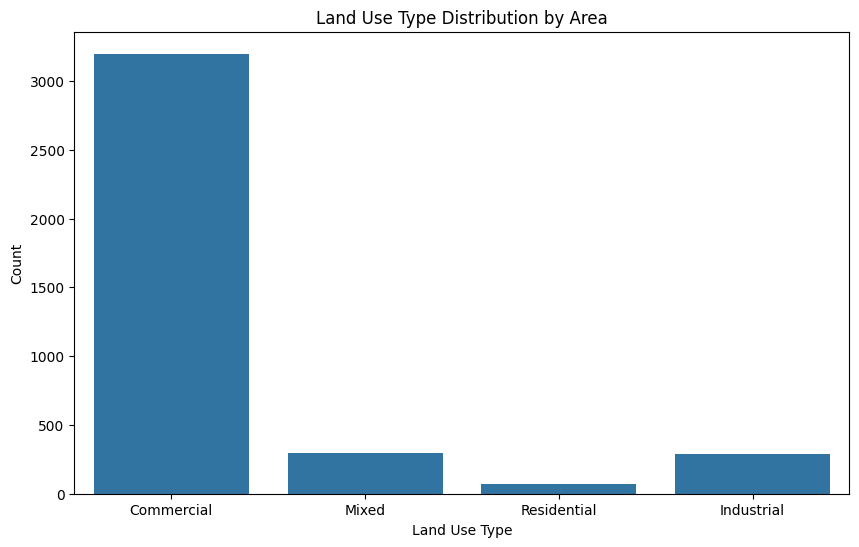

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Land use type', data=merged_data)
plt.title('Land Use Type Distribution by Area')
plt.xlabel('Land Use Type')
plt.ylabel('Count')
plt.show()

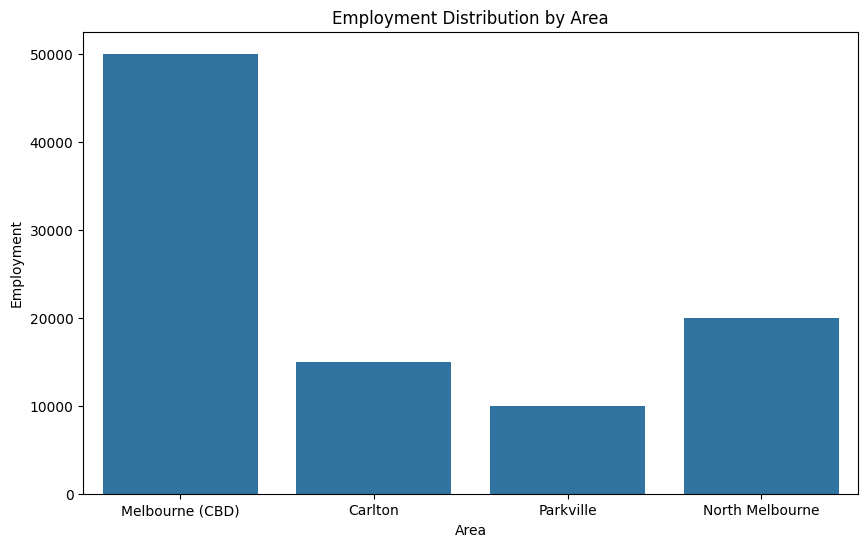

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CLUE small area', y='Employment', data=land_use_df)
plt.title('Employment Distribution by Area')
plt.xlabel('Area')
plt.ylabel('Employment')
plt.show()

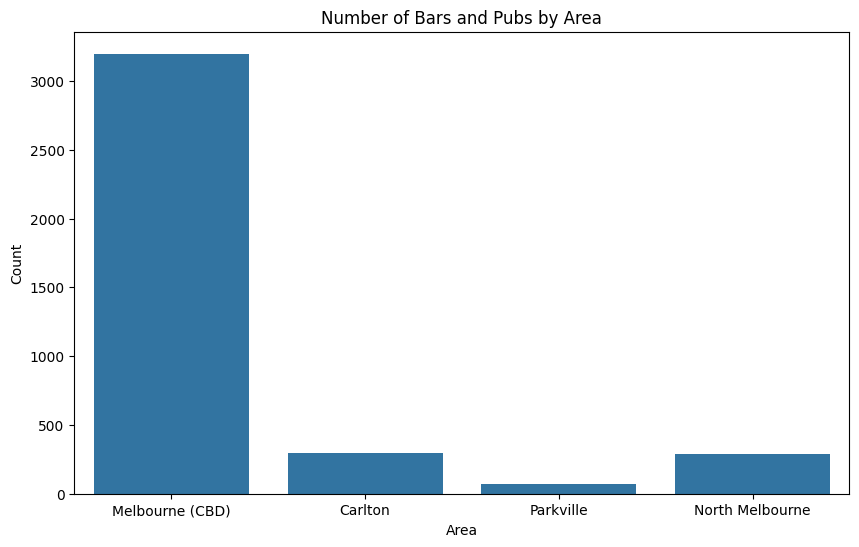

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CLUE small area', data=merged_data)
plt.title('Number of Bars and Pubs by Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

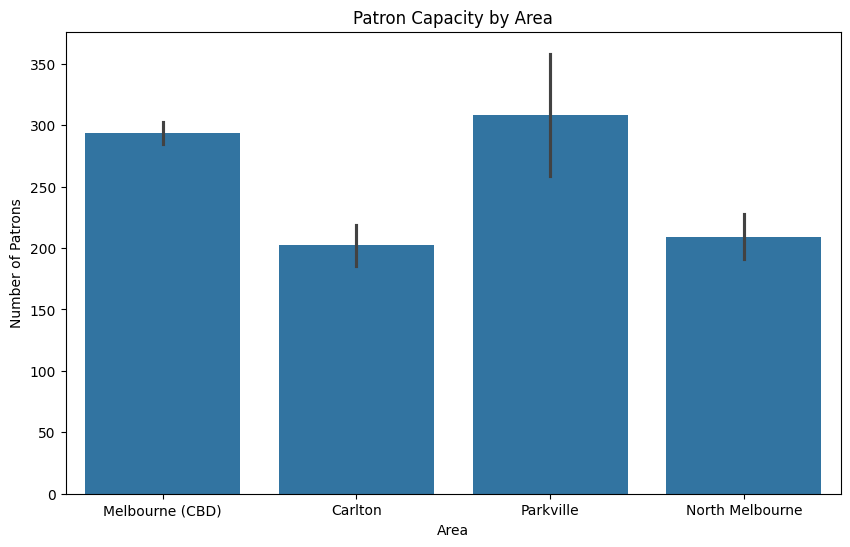

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CLUE small area', y='Number of patrons', data=merged_data)
plt.title('Patron Capacity by Area')
plt.xlabel('Area')
plt.ylabel('Number of Patrons')
plt.show()

                   Employment  Number of patrons
Employment           1.000000           0.114647
Number of patrons    0.114647           1.000000


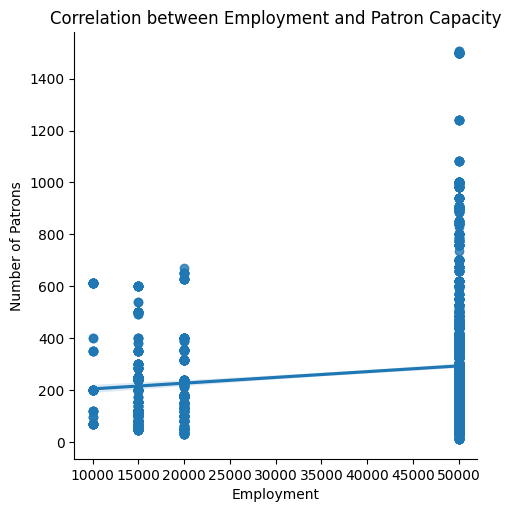

In [15]:
correlation = merged_data[['Employment', 'Number of patrons']].corr()
print(correlation)

sns.lmplot(x='Employment', y='Number of patrons', data=merged_data)
plt.title('Correlation between Employment and Patron Capacity')
plt.xlabel('Employment')
plt.ylabel('Number of Patrons')
plt.show()